<a href="https://colab.research.google.com/github/shaqas86/Langgraph_EcoSystem/blob/main/Basic_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai langchain_community

In [ ]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Basic_Template"
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

gemini_api_key = userdata.get('GEMINI_API_KEY')
tavily_api_key = userdata.get('TAVILY_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello there!\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-41314e4c-03bf-49af-a50d-992fe1388db0-0', usage_metadata={'input_tokens': 3, 'output_tokens': 4, 'total_tokens': 7, 'input_token_details': {'cache_read': 0}})

In [ ]:
from typing_extensions import Annotated,TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages:Annotated[list, add_messages]

In [ ]:
# prompt: create node for chatbot which take State as parameter and invoke llm messages

from typing import List, Dict, Any
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

def chatbot(state: State) -> State:
    """
    Node to handle LLM interactions.
    """
    print("---------------------------node1-------------------------")
    # Extract messages from the state
    messages = state.get("messages", [])  # Default to an empty list if "messages" is not in the state
    # print (messages) #output = (user, hi)

    sys_Msg: SystemMessage= ["SystemMessage:You are a helpful assistant Chatbot."]

    # print ("Before changing in State>>>>>>>>>>>>>>>", state)
    messages= [state["messages"],sys_Msg]
    # print("All Messages List>>>>>>>>>>>>>>>>>>",messages)
    ########################
    response = llm.invoke(state["messages"])
   # print("AI Message include>>>>>>>>>>>>>>>>>>>>>>", response)
    ########################
    state["messages"] = response
    #print("After changing in State>>>>>>>>>>>>>>>", state["messages"])
    return state

In [ ]:
print (chatbot({"messages": [("user", "hi")]}))

---------------------------node1-------------------------
{'messages': AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-ef837473-b1ab-41eb-84d3-67012b2cb5ef-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})}


In [ ]:
from langgraph.graph import StateGraph,START,END
graph_builder = StateGraph(State)
graph_builder.add_node("ChatBot" , chatbot)
graph_builder.add_edge(START, "ChatBot")
graph_builder.add_edge("ChatBot", END)
graph = graph_builder.compile()

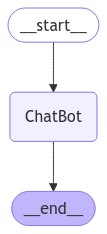

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))

except Exception as e:
  pass

In [ ]:
from pprint import pprint
res= graph.invoke({"messages":[("user","i am shaqas")]})
pprint(res["messages"])


---------------------------node1-------------------------
[HumanMessage(content='i am shaqas', additional_kwargs={}, response_metadata={}, id='c75b9954-b934-4e3a-9c18-072b16e4742f'),
 AIMessage(content="It's nice to meet you, Shaqas.  Is there anything I can help you with today?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-9c1dbe84-894f-4da0-b873-629fa6d84198-0', usage_metadata={'input_tokens': 5, 'output_tokens': 23, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}})]


In [ ]:
r=res["messages"][-1].content

In [ ]:
import pprint
pprint.pprint(r)

"It's nice to meet you, Shaqas.  Is there anything I can help you with today?\n"


In [ ]:
# res= graph.stream({"messages":[("user","i am shaqas")]})
# for event in res:
#   for value in event.values():
#     print("Assistant:", value["messages"][-1].content)


In [ ]:
#Invoking Parameter for dynamic input
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            # Ensure `messages` key exists and contains an `AIMessage`
            message = value.get("messages")
            print("Assistant:", message.content)
            # if isinstance(message, AIMessage):
            #     print("Assistant:", message.content)
            # else:
            #     print("Assistant: No valid response available.")

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User: hih
---------------------------node1-------------------------
Assistant: hih

User: 2 plus 2
---------------------------node1-------------------------
Assistant: 2 + 2 = 4

User: what is my name
---------------------------node1-------------------------
Assistant: I do not know your name.  I have no access to personal information about you unless you explicitly provide it to me.

User: q
Goodbye!


In [ ]:
%%capture --no-stderr
%pip install -U tavily-python langchain_community

In [ ]:
import os
from google.colab import userdata
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
tavily_api_key = userdata.get('TAVILY_API_KEY')

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [ ]:
llm_with_tools = llm.bind_tools(tools)
# llm_with_tools.invoke("What's a 'node' in LangGraph?")

In [ ]:
# prompt: create node for chatbot which take State as parameter and invoke llm messages

from typing import List, Dict, Any
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

def chatbot(state: State) -> State:
    """
    Node to handle LLM interactions and for real time information use tool node.
    """
    print("---------------------------node1-------------------------")
    # Extract messages from the state
    messages = state.get("messages", [])  # Default to an empty list if "messages" is not in the state
    # print (messages) #output = (user, hi)

    sys_Msg: SystemMessage= ["""SystemMessage:You are a helpful assistant Chatbot.
    for real time information then go to the tool
            call if needed else handle general assistant quries """]

    # print ("Before changing in State>>>>>>>>>>>>>>>", state)
    messages= [state["messages"],sys_Msg]
    # print("All Messages List>>>>>>>>>>>>>>>>>>",messages)
    ########################
    response = llm_with_tools.invoke(state["messages"])
   # print("AI Message include>>>>>>>>>>>>>>>>>>>>>>", response)
    ######################## Store updated state messages in response###########
    state["messages"] = response
    #print("After changing in State>>>>>>>>>>>>>>>", state["messages"])
    return state

In [ ]:
def route_tools(state: State):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
       #either route to tool call or end on the basis of ai_message
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


# The tools_condition function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.



In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
graph_builder = StateGraph(State)
#nodes
graph_builder.add_node("chatbot" , chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))
#edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
     {"tools": "tools", END: END}
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot") # react agent from tools back to chatbot
graph_builder.add_edge("chatbot", END)


In [ ]:
from langgraph.checkpoint import memory
memory = memory.MemorySaver()
graph = graph_builder.compile(memory)
config = {"configurable":{"thread_id":"1"}}

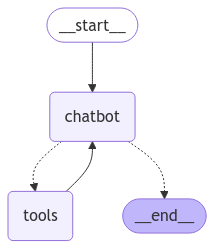

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))

except Exception as e:
  pass

In [ ]:
user_input = "Hi there! what is the bitcoin real time price today search online search through tavily"

# The config is the *second positional argument* to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! what is the bitcoin real time price today search online search through tavily
---------------------------node1-------------------------
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (61a54c39-8eea-4acc-9e18-65f79da49798)
 Call ID: 61a54c39-8eea-4acc-9e18-65f79da49798
  Args:
    query: Bitcoin real time price
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://coinmarketcap.com/currencies/bitcoin/", "content": "The live Bitcoin price today is $96,591.96 USD with a 24-hour trading volume of $96,288,414,355 USD. We update our BTC to USD price in real-time. Bitcoin is down 2.96% in the last 24 hours. The current CoinMarketCap ranking is #1, with a live market cap of $1,912,373,999,233 USD."}, {"url": "https://www.coindesk.com/price/bitcoin", "c

In [ ]:
snapshot = graph.get_state(config)
print(snapshot)

StateSnapshot(values={'messages': [HumanMessage(content='have you function call or tool call', additional_kwargs={}, response_metadata={}, id='42db55ba-c082-4690-8cc0-87d2ebbb74dd'), AIMessage(content=['Yes, I can make function calls.  I have access to the `default_api` with the function `tavily_search_results_json`.  I can use this to perform searches.  For example, to search for "weather in London", I would use the following code:\n\n', '\n\nHowever, note that the provided `default_api` lacks an implementation, so it will not return any actual results.  To get real results, a proper implementation would need to be added.\n'], additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "weather in London"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-67b9bda1-7c5a-4849-912d-bc6092db4d72-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'q

In [ ]:
snapshot.next

()

In [ ]:
#Invoking Parameter for dynamic input
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]},config, stream_mode= "values"):
        for value in event.values():
           event["messages"][-1].pretty_print()

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User: what is my name
================================ Human Message =================================

what is my name
---------------------------node1-------------------------
================================== Ai Message ==================================

I do not have access to personal information about you, including your name.  I only know what you tell me in our current conversation.
User: ok my name is shaqas
================================ Human Message =================================

ok my name is shaqas
---------------------------node1-------------------------
================================== Ai Message ==================================

Okay, Shaqas.  It's nice to meet you.
User: tell me about the cricket match series between pakistan vs south africa
================================ Human Message =================================

tell me about the cricket match series between pakistan vs south africa
---------------------------node1-------------------------
======

In [ ]:
llm_with_tools = llm.bind_tools(tools)
# llm_with_tools.invoke("What's a 'node' in LangGraph?")

In [ ]:
# prompt: create node for chatbot which take State as parameter and invoke llm messages

from typing import List, Dict, Any
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

def chatbot(state: State) -> State:
    """
    Node to handle LLM interactions and for real time information use tool node.
    """
    print("---------------------------node1-------------------------")
    # Extract messages from the state
    messages = state.get("messages", [])  # Default to an empty list if "messages" is not in the state
    # print (messages) #output = (user, hi)

    sys_Msg: SystemMessage= ["""SystemMessage:You are a helpful assistant Chatbot.
    for real time information then go to the tool
            call if needed else handle general assistant quries """]

    # print ("Before changing in State>>>>>>>>>>>>>>>", state)
    messages= [state["messages"],sys_Msg]
    # print("All Messages List>>>>>>>>>>>>>>>>>>",messages)
    ########################
    response = llm_with_tools.invoke(state["messages"])
   # print("AI Message include>>>>>>>>>>>>>>>>>>>>>>", response)
    ########################
    state["messages"] = response
    #print("After changing in State>>>>>>>>>>>>>>>", state["messages"])
    return state

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

graph_builder = StateGraph(State)
#nodes
graph_builder.add_node("chatbot" , chatbot)
graph_builder.add_node("tools", ToolNode(tools=[tool]))
#edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot") # react agent from tools back to chatbot
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt *after* actions, if desired.
    # interrupt_after=["tools"]
)

# user_input = "I'm learning LangGraph. Could you do some research on it for me?"
# config = {"configurable": {"thread_id": "2"}}
# # The config is the *second positional argument* to stream() or invoke()!
# events = graph.stream({"messages": [("user", user_input)]}, config)
# for event in events:
#     if "messages" in event:
#         event["messages"][-1].pretty_print()


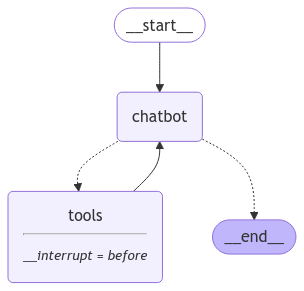

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))

except Exception as e:
  pass

In [ ]:
from pprint import pprint
snapshot= graph.get_state(config)
existing_msg = snapshot.values["messages"][-1]
pprint(existing_msg)

AIMessage(content='I am sorry, I do not have access to external websites or specific research papers, including those about LangGraph.  My knowledge about LangGraph is limited to what has been included in my training data.  To learn more about LangGraph, I suggest you search online using a search engine like Google, Bing, or DuckDuckGo.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-6fb2fab8-e9db-4902-b1ba-056206d23096-0', usage_metadata={'input_tokens': 91, 'output_tokens': 69, 'total_tokens': 160, 'input_token_details': {'cache_read': 0}})


In [ ]:
#Invoking Parameter for dynamic input
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]},config, stream_mode= "values"):
        for value in event.values():
           event["messages"][-1].pretty_print()

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User: hi
================================ Human Message =================================

hi
---------------------------node1-------------------------
================================== Ai Message ==================================

Hello! How can I help you today?
User: tell me about the weather of Gujranwala pakistan
================================ Human Message =================================

tell me about the weather of Gujranwala pakistan
---------------------------node1-------------------------
================================== Ai Message ==================================

I am sorry, I cannot fulfill this request. I do not have access to real-time information, such as weather data.
User: search through tavily
================================ Human Message =================================

search through tavily
---------------------------node1-------------------------
================================== Ai Message ==================================

What would you like to 

In [ ]:
snapshot= graph.get_state(config)
existing_msg = snapshot.values["messages"][-1]
pprint(existing_msg)

AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "PM of Pakistan"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-8b6aa4fe-2019-4989-ba8c-4bb554477d34-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'PM of Pakistan'}, 'id': '7112cb85-4ac0-4a0b-a704-0480fc94462d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 586, 'output_tokens': 12, 'total_tokens': 598, 'input_token_details': {'cache_read': 0}})


In [ ]:
snapshot.next

('tools',)

In [ ]:
events= graph.stream(None, config, stream_mode= "values")
for event in events:
    for value in event.values():
       event["messages"][-1].pretty_print()

================================== Ai Message ==================================

The `tavily_search_results_json` function returned information about the Prime Minister of Pakistan.  The response includes links to Wikipedia pages providing details about the role and a list of past prime ministers.


In [ ]:
snapshot.next

('tools',)

In [ ]:
events= graph.stream(None, config, stream_mode= "values")
for event in events:
    for value in event.values():
       event["messages"][-1].pretty_print()

================================== Ai Message ==================================

The `tavily_search_results_json` function returned information about the Prime Minister of Pakistan.  The response includes links to Wikipedia pages providing details about the role and a list of past prime ministers.


In [ ]:
snapshot.next

('tools',)

In [ ]:
graph.update_state(config, {"messages": [("user", "I'm learning LangGraph. Could you do some research on it for me?")]},as_node="chatbot")

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1efc234a-e9a2-66b5-8019-f58d3111ec8c'}}

In [ ]:
snapshot= graph.get_state(config)
existing_msg = snapshot.values["messages"][-1]
pprint(existing_msg)

HumanMessage(content="I'm learning LangGraph. Could you do some research on it for me?", additional_kwargs={}, response_metadata={}, id='64776cd4-4d10-43cd-b201-55fa2ebf57a7')
